In [57]:
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import numpy as np 
import pandas as pd
import pickle

In [58]:
df=pd.read_csv(r"C:\Users\GIRIRAJ ROY\Downloads\cStick.csv")

In [59]:
df.head(10)

,Distance,Pressure,HRV,Sugar level,SpO2,Accelerometer,Decision
0,25.540,1.0,101.396,61.080,87.770,1.0,1
1,2.595,2.0,110.190,20.207,65.190,1.0,2
2,68.067,0.0,87.412,79.345,99.345,0.0,0
3,13.090,1.0,92.266,36.180,81.545,1.0,1
4,69.430,0.0,89.480,80.000,99.990,0.0,0
5,27.160,1.0,102.584,64.320,88.580,1.0,1
6,57.134,0.0,70.824,73.690,93.690,0.0,0
7,66.356,0.0,84.816,78.460,98.460,0.0,0
8,60.382,0.0,75.752,75.370,95.370,0.0,0
9,23.170,1.0,99.658,56.340,86.585,1.0,1


In [60]:
df.shape

(2039, 7)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2039 entries, 0 to 2038
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Distance       2039 non-null   float64
 1   Pressure       2039 non-null   float64
 2   HRV            2039 non-null   float64
 3   Sugar level    2039 non-null   float64
 4   SpO2           2039 non-null   float64
 5   Accelerometer  2039 non-null   float64
 6   Decision       2039 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 111.6 KB


In [62]:
df.duplicated().sum()

0

In [63]:
df1=df.copy()

In [64]:
df1.head()

,Distance,Pressure,HRV,Sugar level,SpO2,Accelerometer,Decision
0,25.540,1.0,101.396,61.080,87.770,1.0,1
1,2.595,2.0,110.190,20.207,65.190,1.0,2
2,68.067,0.0,87.412,79.345,99.345,0.0,0
3,13.090,1.0,92.266,36.180,81.545,1.0,1
4,69.430,0.0,89.480,80.000,99.990,0.0,0


In [65]:
df['Accelerometer'].unique()

array([1., 0.])

In [66]:
df['Decision '].unique()

array([1, 2, 0], dtype=int64)

In [67]:
df1

,Distance,Pressure,HRV,Sugar level,SpO2,Accelerometer,Decision
0,25.540,1.0,101.396,61.080,87.770,1.0,1
1,2.595,2.0,110.190,20.207,65.190,1.0,2
2,68.067,0.0,87.412,79.345,99.345,0.0,0
3,13.090,1.0,92.266,36.180,81.545,1.0,1
4,69.430,0.0,89.480,80.000,99.990,0.0,0
...,...,...,...,...,...,...,...
2034,5.655,2.0,116.310,162.242,71.310,1.0,2
2035,9.660,2.0,124.320,177.995,79.320,1.0,2
2036,15.220,1.0,93.828,40.440,82.610,1.0,1
2037,9.120,2.0,123.240,175.871,78.240,1.0,2


In [68]:
df1.drop(columns=['Sugar level','Pressure'],inplace=True)

In [69]:
df1.head()

,Distance,HRV,SpO2,Accelerometer,Decision
0,25.540,101.396,87.770,1.0,1
1,2.595,110.190,65.190,1.0,2
2,68.067,87.412,99.345,0.0,0
3,13.090,92.266,81.545,1.0,1
4,69.430,89.480,99.990,0.0,0


In [70]:
x=df1.drop(columns=['Decision '])

In [71]:
x

,Distance,HRV,SpO2,Accelerometer
0,25.540,101.396,87.770,1.0
1,2.595,110.190,65.190,1.0
2,68.067,87.412,99.345,0.0
3,13.090,92.266,81.545,1.0
4,69.430,89.480,99.990,0.0
...,...,...,...,...
2034,5.655,116.310,71.310,1.0
2035,9.660,124.320,79.320,1.0
2036,15.220,93.828,82.610,1.0
2037,9.120,123.240,78.240,1.0


In [72]:
y=df1[['Decision ']]

In [73]:
y.head()

,Decision
0,1
1,2
2,0
3,1
4,0


In [74]:
from sklearn.model_selection import train_test_split

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [76]:
x_train.head(2)

,Distance,HRV,SpO2,Accelerometer
8,60.382,75.752,95.370,0.0
723,55.539,68.404,92.865,0.0


In [77]:
x_test.head(2)

,Distance,HRV,SpO2,Accelerometer
804,15.40,93.960,82.700,1.0
1821,11.71,91.254,80.855,1.0


In [78]:
y_train.head(2)

,Decision
8,0
723,0


In [79]:
y_test.head(2)

,Decision
804,1
1821,1


In [80]:
x_train.shape

(1631, 4)

In [81]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(x_train)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)
x_train_scaled = scaler.transform(x_train)


x_test_scaled = scaler.transform(x_test)


In [82]:
y_train.shape

(1631, 1)

In [83]:
with open('scaler.pkl', 'rb') as f:
        scaler = pickle.load(f)
#y_train_scaled = scaler.transform(y_train)

In [84]:
with open('scaler.pkl', 'rb') as f:
        scaler = pickle.load(f)
y_test_scaled = scaler.fit_transform(y_test)



In [85]:
x_train_scaled.shape

(1631, 4)

In [86]:
#y_train_scaled[:10]

In [87]:
x_train_scaled

array([[0.8631919 , 0.24241305, 0.88447112, 0.        ],
       [0.79395871, 0.1293321 , 0.82183046, 0.        ],
       [0.80805409, 0.15235457, 0.83458365, 0.        ],
       ...,
       [0.06175663, 0.82548476, 0.21605401, 1.        ],
       [0.71560499, 0.00135426, 0.75093773, 0.        ],
       [0.2904849 , 0.57814712, 0.62915729, 1.        ]])

In [88]:
model=Sequential()

model.add(Dense(64,input_dim=4,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(3,activation='softmax'))

C:\Users\GIRIRAJ ROY\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [89]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [90]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,979 (11.64 KB)

 Trainable params: 2,979 (11.64 KB)

 Non-trainable params: 0 (0.00 B)

In [91]:

history = model.fit(x_train_scaled, y_train, epochs=70)

Epoch 1/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 947us/step - accuracy: 0.4621 - loss: 1.0219 
Epoch 2/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - accuracy: 0.9871 - loss: 0.5244
Epoch 3/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - accuracy: 1.0000 - loss: 0.1215
Epoch 4/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 1.0000 - loss: 0.0268
Epoch 5/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - accuracy: 1.0000 - loss: 0.0109
Epoch 6/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - accuracy: 1.0000 - loss: 0.0058
Epoch 7/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - accuracy: 1.0000 - loss: 0.0036
Epoch 8/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 1.0000 - loss: 0.0024
Epoch 9/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - accuracy: 1.0000 - loss: 0.0015
Epoch 10/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - accuracy: 1.0000 - loss: 0.0010   
Epoch 11/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - accuracy: 1.0000 - loss: 8.4765e-04
Epoch 12/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 62

In [92]:
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test)
print(f'Test Accuracy: {test_accuracy}')


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 1.0111e-05 
Test Accuracy: 1.0


In [113]:
import pickle

# Specify the filename
filename = 'mlp_model.pkl'

# Save the model to disk
with open(filename, 'wb') as file:
    pickle.dump(model, file)



In [115]:
# Load the model from disk
with open('mlp_model.pkl', 'rb') as file:
    loaded_mlp_model = pickle.load(file)

# Use the loaded model to make predictions
predictions = loaded_mlp_model.predict(x_test_scaled)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [116]:
predictions

array([[4.0598661e-06, 9.9998045e-01, 1.5491005e-05],
       [6.4619994e-06, 9.9995601e-01, 3.7570226e-05],
       [5.4565021e-07, 5.2325986e-06, 9.9999416e-01],
       ...,
       [9.9999964e-01, 4.0650016e-07, 1.4111266e-08],
       [9.9999952e-01, 4.1767632e-07, 1.1258746e-08],
       [3.5460269e-07, 1.3539500e-06, 9.9999833e-01]], dtype=float32)

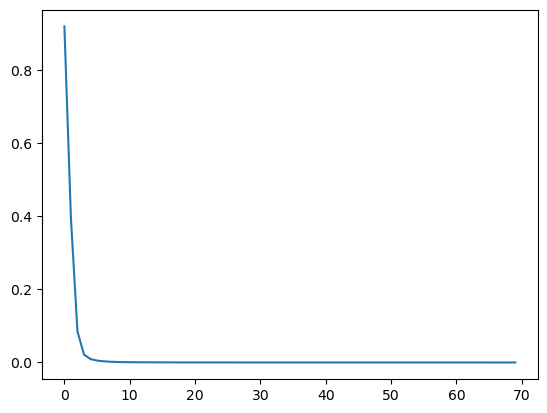

In [93]:
import matplotlib.pyplot as plt 
plt.plot(history.history['loss'])

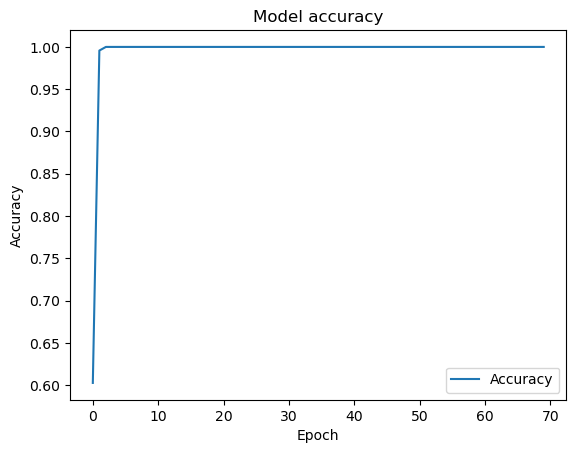

In [94]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy'], loc='lower right')
plt.show()

In [95]:
y_pred=model.predict(x_test_scaled)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [96]:
y_train.head()

,Decision
8,0
723,0
272,0
1170,2
738,1


In [97]:
y_pred[:20]

array([[4.0598661e-06, 9.9998045e-01, 1.5491005e-05],
       [6.4619994e-06, 9.9995601e-01, 3.7570226e-05],
       [5.4565021e-07, 5.2325986e-06, 9.9999416e-01],
       [1.9905142e-06, 9.9999380e-01, 4.2062175e-06],
       [8.5084679e-07, 1.6488457e-05, 9.9998271e-01],
       [4.5739271e-06, 9.9997616e-01, 1.9307303e-05],
       [3.1173539e-07, 2.4608192e-07, 9.9999940e-01],
       [9.9999964e-01, 3.8210618e-07, 2.3553488e-08],
       [7.4911645e-06, 9.9994290e-01, 4.9582872e-05],
       [4.9790708e-07, 3.9697998e-06, 9.9999559e-01],
       [3.4369012e-07, 1.2196266e-06, 9.9999845e-01],
       [9.9999964e-01, 3.7314689e-07, 2.7789445e-08],
       [3.1161622e-07, 2.0859041e-07, 9.9999940e-01],
       [3.1209597e-06, 9.9998677e-01, 1.0127141e-05],
       [9.9999964e-01, 3.7257155e-07, 2.8089522e-08],
       [3.1242550e-07, 6.3859278e-07, 9.9999905e-01],
       [3.4077229e-07, 1.1853629e-06, 9.9999845e-01],
       [3.1168011e-07, 2.2800675e-07, 9.9999940e-01],
       [3.1225514e-07, 5.047

In [98]:
y_test.head(20)

,Decision
804,1
1821,1
1551,2
1740,1
20,2
1827,1
1043,2
1164,0
1309,1
236,2


In [99]:
x_train_scaled[:10]

array([[0.8631919 , 0.24241305, 0.88447112, 0.        ],
       [0.79395871, 0.1293321 , 0.82183046, 0.        ],
       [0.80805409, 0.15235457, 0.83458365, 0.        ],
       [0.02637523, 0.74930748, 0.09227307, 1.        ],
       [0.34923948, 0.62453062, 0.68054514, 1.        ],
       [0.08041228, 0.86565097, 0.28132033, 1.        ],
       [0.18755718, 0.49689135, 0.53913478, 1.        ],
       [0.84121969, 0.20652508, 0.86459115, 0.        ],
       [0.25703339, 0.551739  , 0.59989997, 1.        ],
       [0.13058955, 0.97368421, 0.45686422, 1.        ]])

In [100]:
x_train[:10]

,Distance,HRV,SpO2,Accelerometer
8,60.382,75.752,95.370,0.0
723,55.539,68.404,92.865,0.0
272,56.525,69.900,93.375,0.0
1170,1.845,108.690,63.690,1.0
738,24.430,100.582,87.215,1.0
1649,5.625,116.250,71.250,1.0
1112,13.120,92.288,81.560,1.0
1094,58.845,73.420,94.575,0.0
1253,17.980,95.852,83.990,1.0
1015,9.135,123.270,78.270,1.0


In [101]:
import numpy as np

def convert_to_class(y_pred):
  max_indices = np.argmax(y_pred, axis=1)
  return max_indices


In [102]:
y_true = convert_to_class(y_pred)
print(y_true)

[1 1 2 1 2 1 2 0 1 2 2 0 2 1 0 2 2 2 2 2 1 0 2 1 0 1 1 2 1 2 0 2 1 1 2 2 0
 2 1 0 2 1 0 0 1 0 1 1 1 0 2 1 2 1 2 2 2 1 1 1 0 2 0 1 1 1 0 2 0 2 2 0 2 1
 1 2 2 1 1 2 1 1 1 2 1 0 0 2 2 2 1 1 2 2 0 1 2 1 0 0 1 0 1 2 2 2 2 1 1 1 0
 1 1 1 0 2 0 1 1 1 1 2 1 1 0 2 2 2 0 2 2 1 0 1 1 1 1 2 0 0 1 1 0 1 1 1 2 2
 1 2 1 0 0 2 2 0 0 2 0 0 0 1 2 0 0 2 1 1 2 0 0 1 2 0 2 0 1 1 0 1 2 0 2 1 0
 0 2 1 1 1 0 0 0 0 2 1 1 2 2 1 2 0 2 2 2 2 1 2 2 1 1 0 1 2 2 2 1 1 2 1 0 1
 2 1 1 2 2 0 1 2 1 0 0 1 1 2 0 0 1 1 2 1 1 2 1 2 0 0 1 0 1 0 0 1 1 2 0 2 1
 1 1 1 2 2 2 2 2 1 1 0 1 1 1 1 1 0 2 0 0 0 2 1 1 0 1 1 2 1 1 1 1 1 1 0 2 2
 1 0 0 2 1 1 0 0 2 0 2 1 2 2 2 1 1 0 0 0 2 0 2 0 0 2 0 0 0 2 1 2 1 2 2 2 0
 1 1 2 2 0 0 0 1 1 1 2 2 0 1 0 2 0 2 0 1 1 0 2 0 2 0 0 2 1 1 0 2 0 1 0 1 1
 0 0 0 0 1 0 2 1 2 2 0 0 2 1 1 1 0 2 0 2 0 1 0 1 1 0 2 0 1 1 1 1 1 0 2 0 0
 2]


In [103]:
y_test[:10]

,Decision
804,1
1821,1
1551,2
1740,1
20,2
1827,1
1043,2
1164,0
1309,1
236,2


In [104]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_true)

1.0

In [105]:
model.predict(x_train_scaled[[0]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[9.9999964e-01, 4.0207249e-07, 1.5458809e-08]], dtype=float32)

In [106]:
model.predict(x_train_scaled)

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step


array([[9.9999964e-01, 4.0207249e-07, 1.5458809e-08],
       [9.9999964e-01, 3.8493749e-07, 2.2216025e-08],
       [9.9999964e-01, 3.8836563e-07, 2.0634907e-08],
       ...,
       [3.1600032e-07, 7.2499284e-07, 9.9999893e-01],
       [9.9999964e-01, 3.7020561e-07, 3.3998436e-08],
       [2.8257787e-06, 9.9998856e-01, 8.5920119e-06]], dtype=float32)

In [119]:
import numpy as np
with open('mlp_model.pkl', 'rb') as file:
    loaded_mlp_model = pickle.load(file)

# Use the loaded model to make predictions
predictions = loaded_mlp_model.predict(x_test_scaled)

def predict_fall(loaded_mlp_model, input_array):
    with open('scaler.pkl', 'rb') as f:
        scaler = pickle.load(f)
    input_reshaped = np.array(input_array)
    scaled_input=scaler.transform([input_reshaped]).flatten()
    input_2d=np.array([scaled_input])
    print(scaled_input)
    output=loaded_mlp_model.predict(input_2d)

    return np.argmax(output, axis=1)[0]
    #return output

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [120]:
predict_fall(loaded_mlp_model,[2.2,42.3,98.15,0.0])

[ 0.03145014 -0.27239151  0.9539885   0.        ]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


C:\Users\GIRIRAJ ROY\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


0

In [109]:
#x_test_scaled

In [110]:
x_test.head(15)

,Distance,HRV,SpO2,Accelerometer
804,15.400,93.960,82.700,1.0
1821,11.710,91.254,80.855,1.0
1551,7.395,119.790,74.790,1.0
1740,26.950,102.430,88.475,1.0
20,8.730,122.460,77.460,1.0
1827,14.080,92.992,82.040,1.0
1043,1.815,108.630,63.630,1.0
1164,54.756,67.216,92.460,0.0
1309,10.870,90.638,80.435,1.0
236,7.020,119.040,74.040,1.0


In [111]:
y_test.head(3)

,Decision
804,1
1821,1
1551,2


In [123]:
import base64
# Convert function to a string
function_str = """
with open('mlp_model.pkl', 'rb') as file:
    loaded_mlp_model = pickle.load(file)
def predict_fall(loaded_mlp_model, input_array):
    with open('scaler.pkl', 'rb') as f:
        scaler = pickle.load(f)
    input_reshaped = np.array(input_array)
    scaled_input=scaler.transform([input_reshaped]).flatten()
    input_2d=np.array([scaled_input])
    print(scaled_input)
    output=loaded_mlp_model.predict(input_2d)

    return np.argmax(output, axis=1)[0]
    #return output
"""

# Serialize the model
with open('mlp_model.pkl', 'rb') as file:
    serialized_model = base64.b64encode(file.read()).decode('utf-8')

# Replace placeholder with actual model data
function_str = function_str.replace('encoded_model_data', serialized_model)

# Write to a .h file
with open('mlp_model.h', 'w') as file:
    file.write(f'const char* python_script = R"({function_str})";')


In [125]:
with open('mlp_model.h', 'rb') as file:
    print(file)


<_io.BufferedReader name='mlp_model.h'>
